# Q-Learning - Frozen Lake

In [1]:
import numpy as np
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import math
import copy

In [2]:
class Environment:
    def __init__(self, width, height, start, goal):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.gameOver=False
        self.actor_position = start
        self.airCurrentsColumns=[3,4,5]
        self.airCurrentsProbs={3:0.9,4:0.8,5:0.9}
        self.airCurrentsStrength={3:1,4:2,5:1}
        self.goalReward=10
        self.normalBoxReward=-1
        self.penaltyFalling=-2
        

    def reset(self):
        self.gameOver=False
        self.actor_position = self.start
        return self.__getCurrentState__()
    
    def move_up(self,canGetOutOfTheMap=False):
        if self.actor_position[1] > 0 or canGetOutOfTheMap:
            self.actor_position = (self.actor_position[0], self.actor_position[1] - 1)

    def move_right(self):
        if self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1])

    def move_down(self):
        if self.actor_position[1] < self.height - 1:
            self.actor_position = (self.actor_position[0], self.actor_position[1] + 1)

    def move_left(self):
        if self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1])

    def move_up_left(self):
        if self.actor_position[1] > 0  and self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1] - 1)
    def move_down_left(self):
        if self.actor_position[1] < self.height - 1 and self.actor_position[0] > 0:
            self.actor_position = (self.actor_position[0] - 1, self.actor_position[1] + 1)
    def move_down_right(self):
        if self.actor_position[1] < self.height - 1 and self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1] + 1)
    def move_up_right(self):
        if self.actor_position[1] > 0 and self.actor_position[0] < self.width - 1:
            self.actor_position = (self.actor_position[0] + 1, self.actor_position[1] - 1)


    
    def doAction(self,action):
        if int(action) == 0:
            env.move_up()
        elif int(action) == 1:
            env.move_up_right()
        elif int(action) == 2:
            env.move_right()
        elif int(action) == 3:
            env.move_down_right()
        elif int(action) == 4:
            env.move_down()
        elif int(action) == 5:
            env.move_down_left()
        elif int(action) == 6:
            env.move_left()
        elif int(action) == 7:
            env.move_up_left()
    
    def moveAirCurrent(self):
        if self.actor_position[0] in self.airCurrentsColumns:
            rand=random.random()
            if rand<=self.airCurrentsProbs[self.actor_position[0]]:
                for _ in range(self.airCurrentsStrength[self.actor_position[0]]):
                    self.move_up(canGetOutOfTheMap=True)
                    
                    
                
    def __getCurrentState__(self):
        return self.width*self.actor_position[1]+self.actor_position[0]
    
    def calculateReward(self):
        if self.actor_position == self.goal:
            self.gameOver=True 
            return self.goalReward
        elif self.actor_position[1]<0:
            self.gameOver=True 
            return self.penaltyFalling
        else:
            return self.normalBoxReward
    
    def step(self,action):
        self.doAction(action)
        self.moveAirCurrent()
        
        reward=self.calculateReward()
        return self.__getCurrentState__(),reward,self.gameOver
    
    def render(self):
        for row in range(self.height):
            for col in range(self.width):
                if (col, row) == self.actor_position:
                    print("S", end=" ")
                elif (col, row) == self.goal:
                    print("G", end=" ")
                else:
                    print(".", end=" ")
            print()


Create game environment for frozen lake.

In [3]:
env = Environment(9,7, (1,1), (7, 4))


Render the environment:

In [4]:
env.reset()                    
env.render()

. . . . . . . . . 
. S . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . G . 
. . . . . . . . . 
. . . . . . . . . 


# Complete the code

Initialize some parameters.

In [5]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.2
discount_rate = 0.95

rewards_avg = []

q_tableOrig =  [[0] * 8 for _ in range(9*7)]

Run Q-Learning algorithm:

In [6]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.
rewards_avg=[]
for it in range(50):
    print('average ', it)
    rewards_all_episodes=[]
    
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.0005
    
    q_table = [[0] * 8 for _ in range(9*7)]
    # iterate over the episodes
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        currentQTable=copy.deepcopy(q_table)
        rewards_current_episode = 0
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.random()
            if exploration_rate_threshold <= exploration_rate:
                action = random.randint(0,7)
            else:
                action = np.argmax(currentQTable[state])

            # Take action
            new_state, reward, done = env.step(action)
            """if done==True and reward==0:
                reward=-1
            elif reward==0:
                reward=0
            else:
                reward=1"""
            #reward-=step*0.05
            # Update Q-table for Q(s,a)  
            value=(1-learning_rate)*currentQTable[state][action]+learning_rate*(reward+discount_rate*max(currentQTable[new_state]))
            
            q_table[state][action] = value
            
            # transition next state
            state = new_state
            rewards_current_episode += reward
            if done == True:
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate+(max_exploration_rate-min_exploration_rate)*pow(math.e,(-exploration_decay_rate*episode))

        rewards_all_episodes.append(rewards_current_episode)
    #print(q_table)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9
average  10
average  11
average  12
average  13
average  14
average  15
average  16
average  17
average  18
average  19
average  20
average  21
average  22
average  23
average  24
average  25
average  26
average  27
average  28
average  29
average  30
average  31
average  32
average  33
average  34
average  35
average  36
average  37
average  38
average  39
average  40
average  41
average  42
average  43
average  44
average  45
average  46
average  47
average  48
average  49


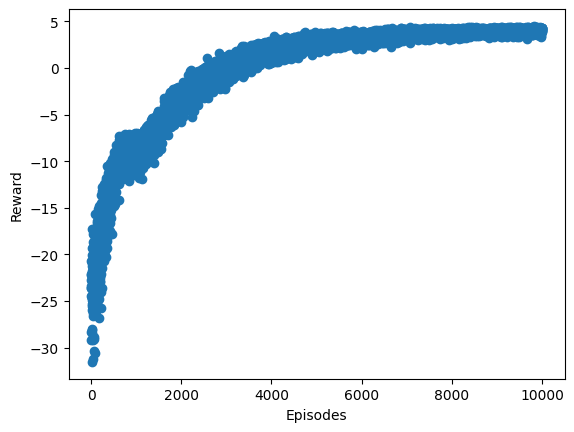

In [7]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


watch it play!

In [9]:
for episode in range(3):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state])   
        
        new_state, reward, done = env.step(action)
        clear_output(wait=True)
        print(action)
        env.render()
        if done:
            
            if reward == 10:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state

3
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . . . 
. . . . . . . S . 
. . . . . . . . . 
. . . . . . . . . 
****You reached the goal!****


In [10]:
for line in q_table:
    print(line)

[0.1734691102230462, 0.1863637035905185, 0.15662839150566268, 1.3360122086086161, 0.8541280392797754, -0.0496158268822575, -0.15443353908046345, -0.1708696767681517]
[0.27304359601401684, 0.24170352332821665, 0.32847563800407625, 1.3677013290643936, 1.2039462875650684, 0.896561303970884, 0.029030778560723884, 0.1424817375405401]
[0.1390788164554838, 0.31540215456870235, -1.9909673072562195, 0.45053429209778495, 1.4162535618062915, 1.228034927342614, 0.3146042366793566, 0.29496745511587086]
[-1.8293110475704157, -1.9705186737502585, 0.6617864071931032, -1.3860279149236283, 0.44530841198731896, 1.324521223164262, 0.39636419656333166, -1.9585173327160406]
[0.6620725718911381, 0.13389378866378593, -1.9371053189910454, 4.878034789339048, 1.3609032147972997, 0.3512907343071805, -1.8862166527142983, 0.5499668853114357]
[-1.4791935834466217, -0.730815333542889, 4.400963105403485, 5.721249999999992, 4.5317455633387755, -0.8567755673749926, -0.22566175976133118, -0.4882267485385947]
[3.284704807

In [11]:
for line in q_table:
    print(max(line))

1.3360122086086161
1.3677013290643936
1.4162535618062915
1.324521223164262
4.878034789339048
5.721249999999992
5.7212499999980375
5.720802710455358
5.413000024545746
2.0527565233683687
2.6237021936785414
2.4810959427170713
3.7233203854436843
5.90197980304514
7.074999999999991
7.074999999999991
7.074999999993426
7.046538712802969
2.052756154354218
3.213427964119172
3.8556232490449416
4.9742988884648
7.074999999999991
8.499999999999993
8.499999999999993
8.499999999999993
8.483301595594359
2.050454612924653
3.2134277448504145
4.435187422836
5.721249999999992
7.074999999999991
8.499999999999993
9.999999999999996
9.999999999999996
9.952776335171304
1.943731494447152
3.2130359687709387
4.435180486913878
5.72124925815274
7.074999999999984
8.499999999999993
9.999999999999973
0
9.81985601490518
1.4016370189689737
2.810281356177381
4.395488534524956
5.016857525675851
1.2100395226869174
1.9756418425874482
6.4599942872223926
9.450244186112002
8.322278400000002
-1.9170953221871079
0.601215420934884

In [39]:
#we get the max values from our table, if all our values are 0 then we set them as 8, which in our tuple is nothing
max_values = np.max(q_table, axis=1)
max_positions = np.argmax(q_table, axis=1)

max_positions[max_values == 0] = 8

print(max_positions)

[3 3 4 5 3 3 4 5 5 3 3 4 3 3 3 4 4 5 2 3 3 3 3 3 4 5 5 1 2 3 3 3 2 3 4 5 2
 2 2 2 2 1 2 8 6 1 2 1 1 1 0 7 0 7 2 1 2 8 5 8 7 0 7]


In [40]:
arrows = {"R":(1,0), "L":(-1,0),"U":(0,1),"D":(0,-1), "RU":(1,1), "LU":(-1,1), "LD":(-1,-1),"RD":(1,-1), 'N':(0,0)}
scale = 0.25

arrowsTuple = {'U': 0,
               'RU': 1,
               'R':2,
               'RD':3,
               'D':4,
               'LD':5,
               'L':6,
               'LU':7,
               'N':8
               }


In [41]:
# we assign an arrow to the matrix based on our arrowsTuple value
ar = np.empty((7, 9), dtype=object)

for i, pos in enumerate(max_positions):
        arrow_values = list(arrowsTuple.values())
        pos_index = arrow_values.index(pos)
        arrow_keys = list(arrowsTuple.keys())
        arrow = arrow_keys[pos_index]

        ar[i // 9, i % 9] = arrow

print(ar)

[['RD' 'RD' 'D' 'LD' 'RD' 'RD' 'D' 'LD' 'LD']
 ['RD' 'RD' 'D' 'RD' 'RD' 'RD' 'D' 'D' 'LD']
 ['R' 'RD' 'RD' 'RD' 'RD' 'RD' 'D' 'LD' 'LD']
 ['RU' 'R' 'RD' 'RD' 'RD' 'R' 'RD' 'D' 'LD']
 ['R' 'R' 'R' 'R' 'R' 'RU' 'R' 'N' 'L']
 ['RU' 'R' 'RU' 'RU' 'RU' 'U' 'LU' 'U' 'LU']
 ['R' 'RU' 'R' 'N' 'LD' 'N' 'LU' 'U' 'LU']]


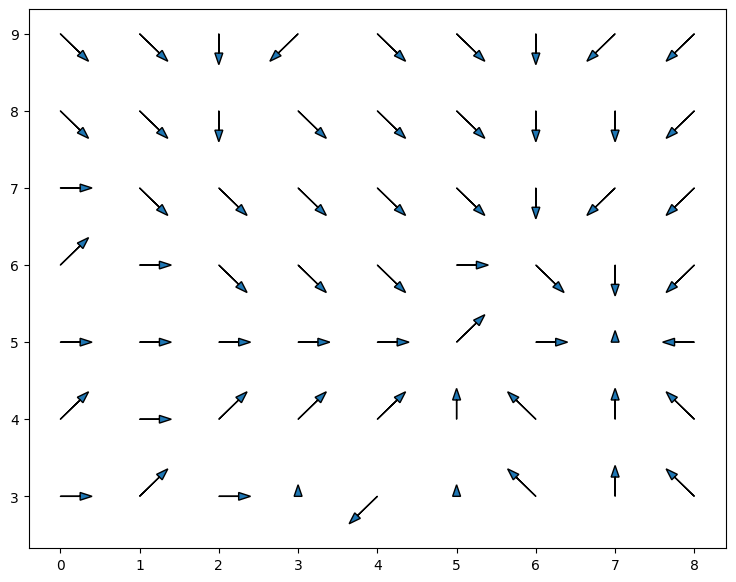

In [45]:
fig, ax = plot.subplots(figsize=(9, 7))
for r, row in enumerate(ar):
    for c, cell in enumerate(row):
            plot.arrow(c, 9-r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

#### 1. How do you plan to solve the problem using Q-learning?

Q-learning is a reinforcement learning algorithm that learns an optimal policy through trial and error. The optimal policy is derived from the Q-table, which guides the agent's decision-making process by providing the best action-value estimates for each state-action pair.

We plan to solve the problem using Q-learning by filling a Q-table with 63 rows (representing all the cells in the 9x7 matrix) and 8 columns (representing the 8 possible movements) of the same size as our matrix. During the learning process, we will determine the most effective actions to navigate the matrix by updating the Q-table.

Our rewards will be as follows: 10 points if the agent reaches the goal, a deduction of 1 point for each step taken to reach the goal, and a deduction of 2 points if the agent falls off the map due to wind.

By running the program with enough iterations, we will obtain the average values in the Q-table for each cell. We will use these values to guide the program's actions, and they will also help us determine the optimal policy after training.

#### 2. Find the optimal policy (plot an arrow in each grid cell indicating the best action to take for that cell) and plot the average reward over time.

After obtaining our Q-table values, we have the following optimal policy:

![optimal policy](./optimal%20policy.PNG)

Here we can see that from the initial position, the agent tries to move towards the southeast, right, and down to reach the goal. We can also see that all positions near the goal attempt to reach the goal, indicating that our Q-table is functioning as intended by always aiming to reach the goal. Finally, there are arrows with no line, which represent positions where our Q-table did not have any values because the agent never reached those positions. We can verify this by running the game, and we will observe that the agent attempts the movements shown in our optimal policy.

Regarding our average reward over time, we can see that our reward improves with time. Initially, it found the goal after ~40 movements and after 4000 episodes, we started to achieve a reward of 0, indicating that we successfully reach the goal within 10 movements. After 10000 episodes, we achieved a reward of 5, meaning that we reached the goal in just 5 movements. We can also observe that our algorithm does not improve further, which is correct since the minimum distance to the goal is indeed 5 movements, we lose 1 point of reward each movement so by using our rewards as movements: 10 points by getting to the goal and -5 points for our 5 movements we are indeed getting to the goal in our minimum movements possible. Therefore, we can confidently conclude that we have found the most optimal path to reach the goal after the training process.

![optimal policy](./average%20reward%20over%20time.PNG)

# SOURCES

https://stackoverflow.com/questions/72751096/plot-a-grid-with-arrows-on-it

basic structure of env: https://chat.openai.com

